In [1]:
from utils_data_reader import get_datasets_pytorch, prep_data_range, move_alt_axis_for_numpy
from utils_plot import *
from utils_optim import numpy_custom_loss, numpy_mape, numpy_mse
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from utils_data_mapper import StandardScaler

In [2]:
gt_2017 = prep_data_range([2017])
pr_2017 = np.load('pr_2017.npy')

print(gt_2017.shape)
print(pr_2017.shape)

Loading data for year 2017
Concatenating data...
(8736, 24, 20, 36)
(8736, 24, 20, 36)


In [3]:
# dates to plot
dates = [[1, 1, 2017],
         [2, 1, 2017],
         [3, 1, 2017],
         [4, 1, 2017],
         [5, 1, 2017],
         [6, 1, 2017],
         [7, 1, 2017],]

# get indices for dates
date_idx_list = [calc_hour_index(date[0], date[1], date[2]) for date in dates]



[0, 744, 1416, 2160, 2880, 3624, 4344]
[0, 744, 1416, 2160, 2880, 3624, 4344]
[0, 744, 1416, 2160, 2880, 3624, 4344]


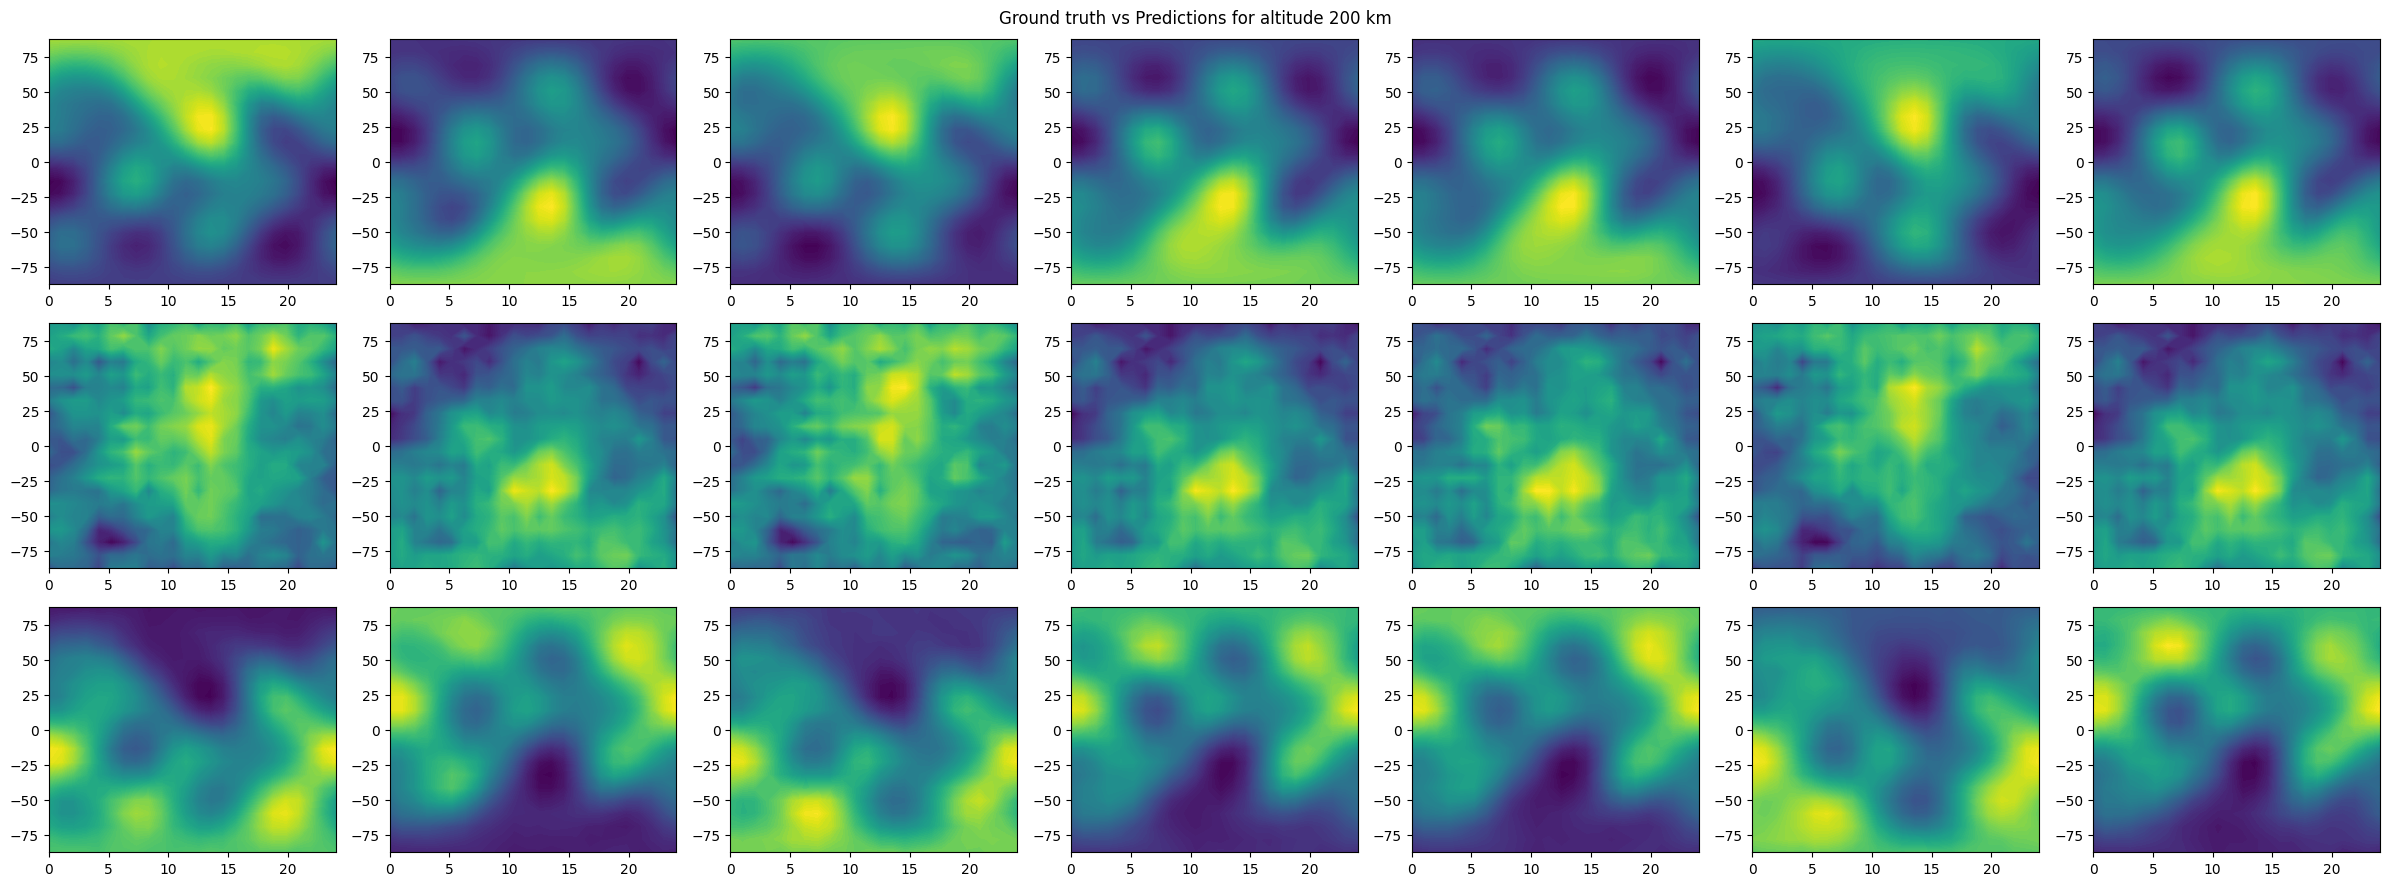

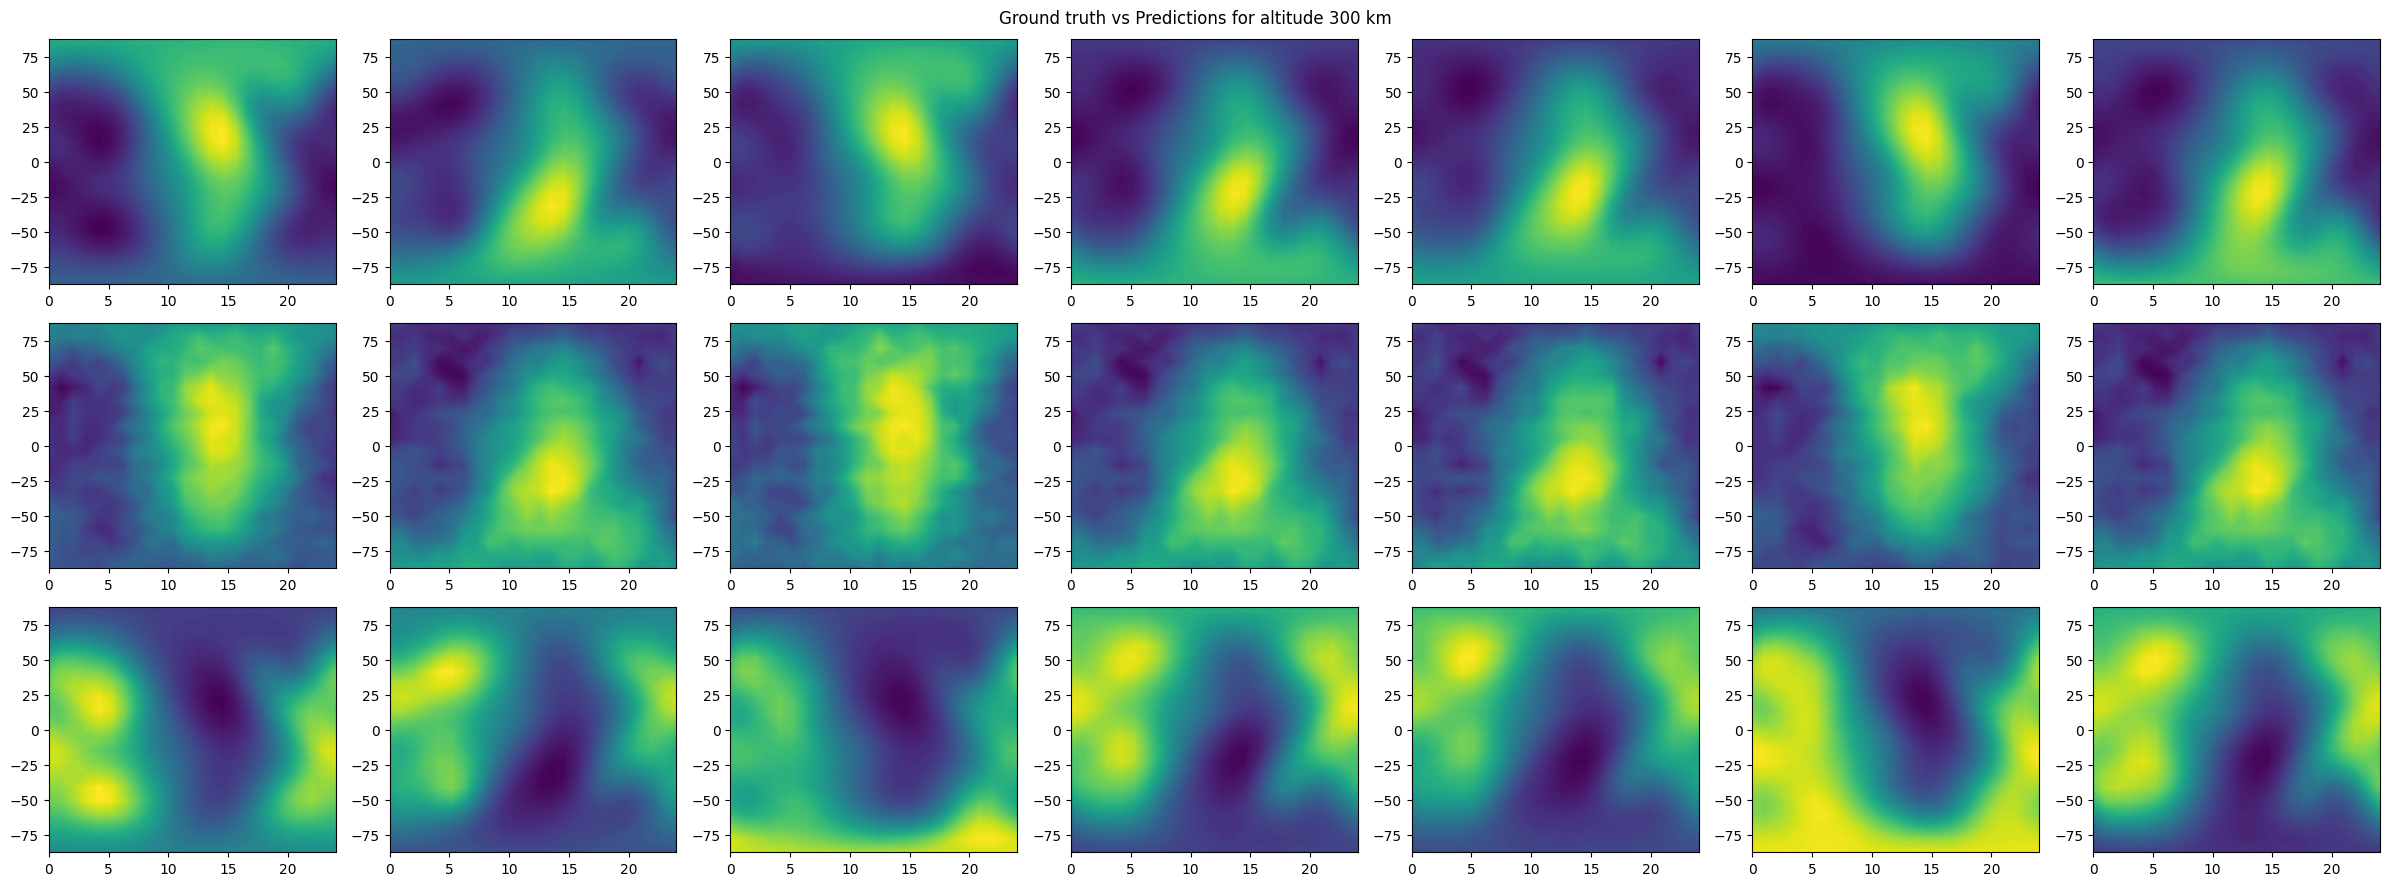

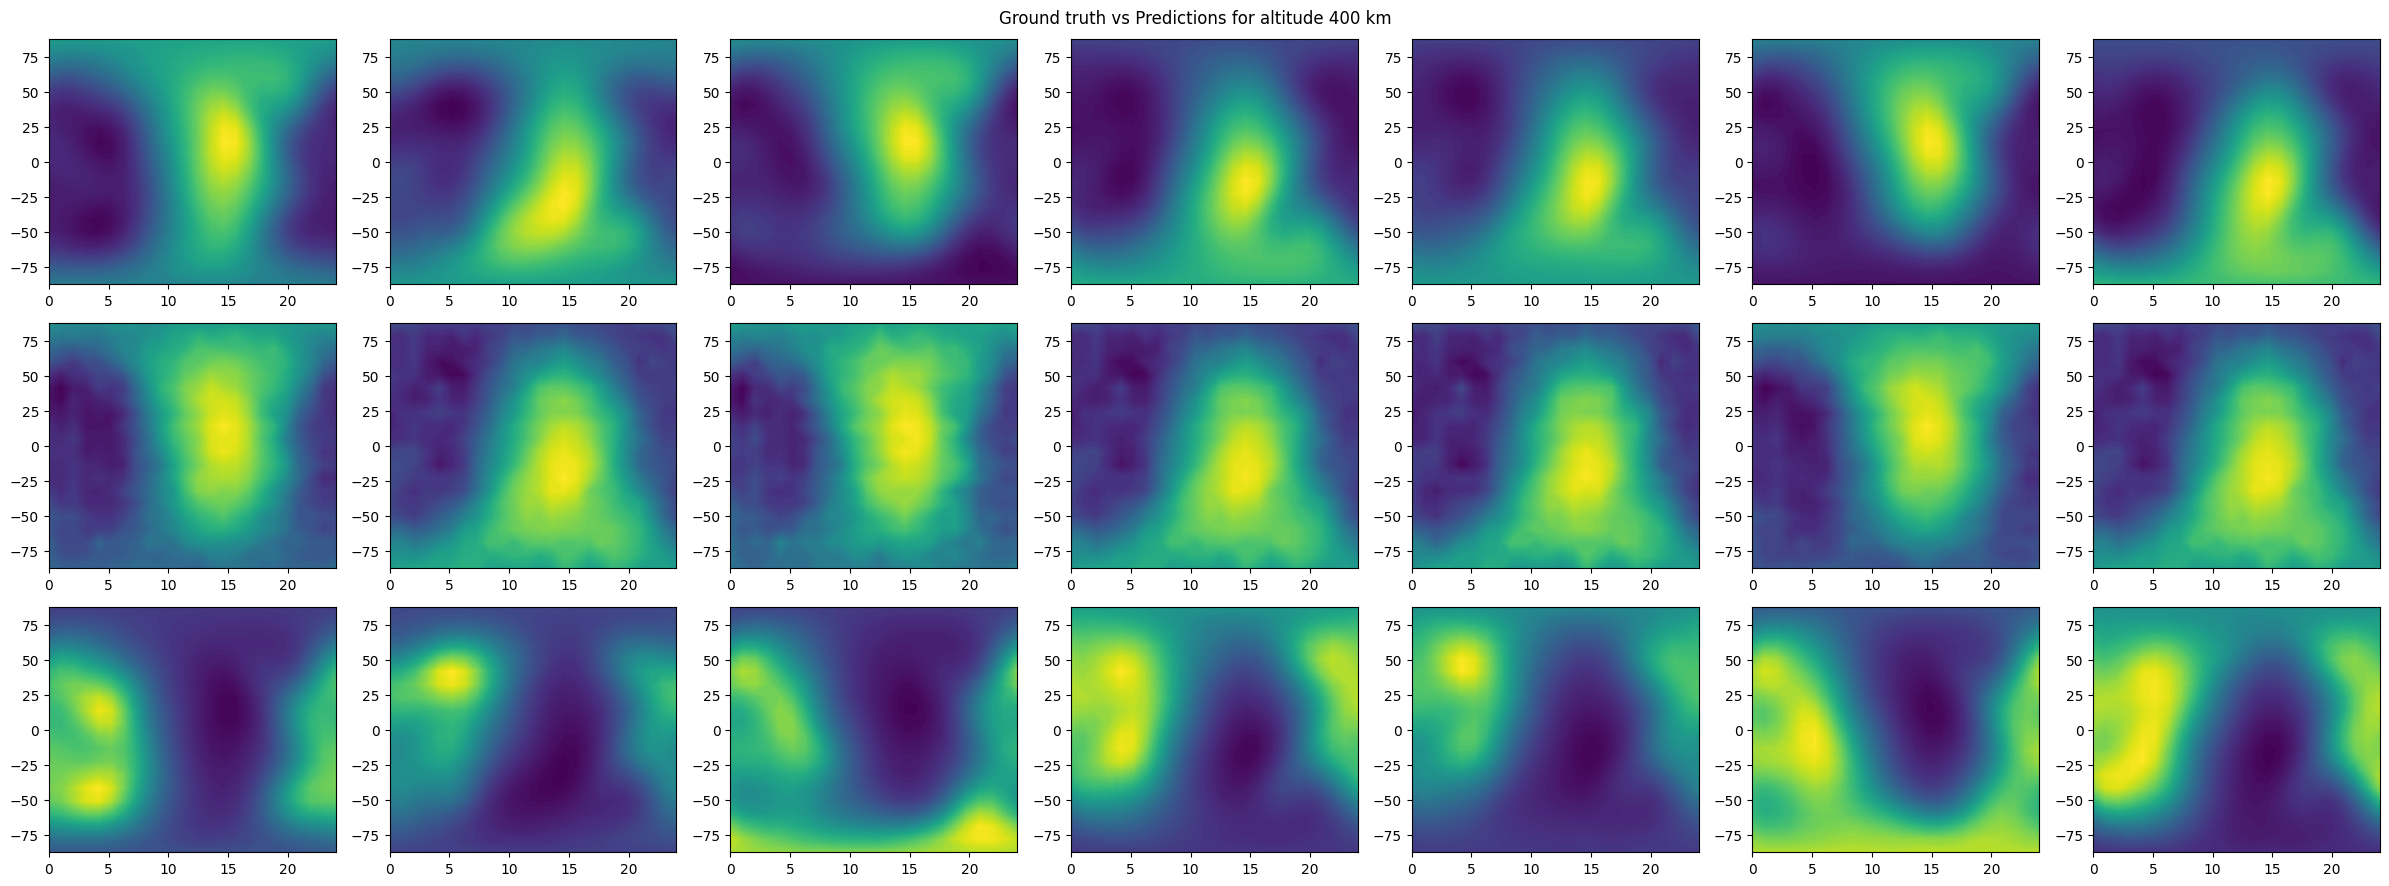

In [4]:

# plot
def plot_all(gt_dates:np.ndarray, pr_dates:np.ndarray, date_idx_list:List[int], alt:float):
    localSolarTimes = np.linspace(0, 24, 24) # 24 
    latitudes = np.linspace(-87.5, 87.5, 20) # 20
    altitudes = np.linspace(100, 800, 36)    # 36
    altitude_index = get_altitude_index(altitudes, alt)



    print(date_idx_list)
    N = len(date_idx_list)

    plt.figure(figsize=(24, 9))
    plt.suptitle(f'Ground truth vs Predictions for altitude {alt} km')

    for i in range(N):
        date_idx=date_idx_list[i]
        gt_rho = gt_dates[date_idx, :, :, altitude_index]
        gt_rho = np.power(10, gt_rho)

        pr_rho = pr_dates[date_idx, :, :, altitude_index]
        pr_rho = np.power(10, pr_rho)

        # Plot the gt data for the selected hour and altitude
        plt.subplot(3, 7, i+1)
        plt.contourf(localSolarTimes, latitudes, gt_rho.T, 100)
        

        # Plot the pr data for the selected hour and altitude
        plt.subplot(3, 7, i+8)
        plt.contourf(localSolarTimes, latitudes, pr_rho.T, 100)


        # Calculate mape
        mape = np.abs(gt_rho - pr_rho) / np.abs(gt_rho)
        plt.subplot(3, 7, i+15)
        plt.contourf(localSolarTimes, latitudes, mape.T, 100)
        
    
    plt.tight_layout()
        
for alt in [200, 300, 400]:
    plot_all(gt_2017, pr_2017, date_idx_list,  alt)

In [20]:
gt_2017_nn = np.load('gt_2017_nn.npy')
pr_2017_nn = np.load('pr_2017_nn.npy')
print(gt_2017_nn.shape) 
print(pr_2017_nn.shape)


(8736, 36, 20, 24)
(8736, 36, 20, 24)


[0.12331579 0.10212981 0.09320187 ... 0.08117374 0.09719066 0.07516823]
0.09340179844152713


(0.0, 20.0)

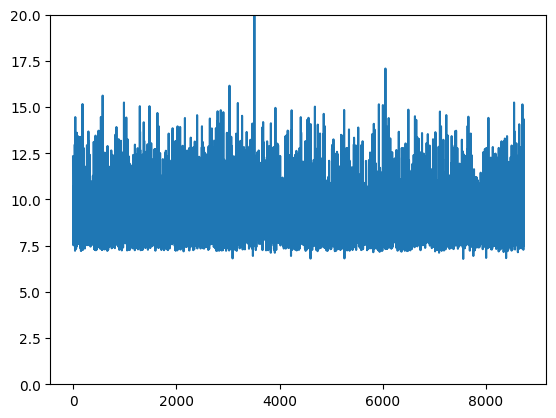

In [34]:
mape = np.abs(gt_2017_nn - pr_2017_nn) / np.abs(gt_2017_nn + 1e-6)
mape = np.mean(mape, axis=(1,2,3))
mape_all = np.mean(mape)
print(mape)
print(mape_all)

plt.figure()
plt.plot(mape*100, '-', markersize=0.1)
plt.ylim([0, 20])
